# Figures for 2018 ADAP Proposal

In [12]:
import os, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import fitsio
from astropy.table import Table, vstack

In [25]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.8, palette='Set2')
%matplotlib inline

In [26]:
LSLGAdir = os.getenv('LSLGA_DIR')
adapdir = os.path.join(os.getenv('HOME'), 'repos', 'papers', 'grants', 'nasa-adap-2018')

In [27]:
PIXSCALE = 0.262

In [28]:
leda = Table.read(os.path.join(LSLGAdir, 'sample', 'hyperleda-d25min10-18may13.fits'))
parent = Table.read(os.path.join(LSLGAdir, 'sample', 'large-galaxies-parent.fits'))

### Sensitivity vs wavelength

In [86]:
def sensitivity(png=None):
    """Code by K. Napier."""
    df = pd.DataFrame()
    df['wavelength'] = [3.4, 4.6, 12, 22, 
                        3.4, 4.6, 12, 22, 
                        0.3551, 0.4686, 0.6165, 0.7481, 0.8931, 
                        0.464, 0.658, 0.8931, 
                        0.464, 0.658, 0.9, 
                        1.25, 1.65, 2.17, 
                        0.1528, 0.1528, 0.1528, 0.2271, 0.2271, 0.2271,
                        0.44]

    df['mag'] = [18.53, 17.63, 13.4, 10.6, 
                 19.03, 18.13, 13.4, 10.6, 
                 22.15, 23.13, 22.70, 22.20, 20.71,
                 26.5, 26, 24.7, 
                 24.1, 23.5, 22.9, 
                 15.8, 15.1, 14.3, 
                 19.9, 22.6, 24.8, 20.8, 22.7, 24.4,
                 15.4]
    
    df['survey'] = ['WISE', 'WISE', 'WISE', 'WISE', 
                    'UNWISE', 'UNWISE', 'UNWISE', 'UNWISE', 
                    'SDSS', 'SDSS', 'SDSS', 'SDSS', 'SDSS', 
                    'DES', 'DES', 'DES', 
                    'LS', 'LS', 'LS', 
                    '2MASS', '2MASS', '2MASS', 
                    'GALEXAIS', 'GALEXMIS', 'GALEXDIS', 'GALEXAIS', 'GALEXMIS', 'GALEXDIS',
                    'RC3']

    df['band'] = ['W1', 'W2', 'W3', 'W4', 
                  'W1', 'W2', 'W3', 'W4', 
                  'u', 'g', 'r', 'i', 'z', 
                  'g', 'r', 'z', 
                  'g', 'r', 'z', 
                  'J', 'H', 'Ks', 
                  'FUV', 'FUV', 'FUV', 'NUV', 'NUV', 'NUV',
                  'B']

    df['mulim'] = df.mag + 2.5 * np.log10(np.pi*2.5**2)
    
    wise = df[df.survey == 'WISE']
    unwise = df[df.survey == 'UNWISE']
    sdss = df[df.survey == 'SDSS']
    des = df[df.survey == 'DES']
    ls = df[df.survey == 'LS']
    twomass = df[df.survey == '2MASS']
    galexa = df[df.survey == 'GALEXAIS']
    galexm = df[df.survey == 'GALEXMIS']
    galexd = df[df.survey == 'GALEXDIS']
    rc3 = df[df.survey == 'RC3']
    
    fig, ax = plt.subplots(figsize=(14,10))

    # Plot unWISE
    ax.scatter(unwise.wavelength, unwise.mulim, s=300, facecolors='tomato', 
               edgecolors='k', label='WISE (5-Year)', marker='s')

    #ax.scatter(wise.wavelength[:2], wise.mulim[:2], s=300, facecolors='tomato', 
    #           edgecolors='k', label='WISE (5-Year)', marker='s')

    # Plot 2MASS
    ax.scatter(twomass.wavelength, twomass.mulim, s=200, facecolors='gray', 
               edgecolors='none', alpha=0.5, label='2MASS', marker='o')

    # Plot RC3
    ax.scatter(rc3.wavelength, rc3.mulim, s=200, facecolors='gray', 
               edgecolors='none', alpha=0.5, label='RC3', marker='o')
    
    # Plot SDSS
    ax.scatter(sdss.wavelength, sdss.mulim, s=200, facecolors='gray', 
               edgecolors='none', alpha=0.5,  label='SDSS', marker='o')

    # Plot Legacy Surveys
    ax.scatter(ls.wavelength, ls.mulim, s=300, facecolors='lightgreen', 
               edgecolors='k', label='Legacy Surveys', marker='s')

    # Plot Galex
    ax.scatter(galexa.wavelength, galexa.mulim, s=300, facecolors='navy', 
               edgecolors='k', label='GALEX-AIS', marker='s')
    ax.scatter(galexm.wavelength, galexm.mulim, s=300, facecolors='navy', 
               edgecolors='k', label='GALEX-MIS', marker='s', alpha=0.65)

    # Connect Galex points
    ax.plot([galexa.wavelength.values[0], galexa.wavelength.values[0]], 
            [galexa.mulim.values[0]+0.35, galexm.mulim.values[0]-0.35], color='k', linestyle='-', linewidth=1)
    ax.plot([galexa.wavelength.values[1], galexa.wavelength.values[1]], 
            [galexa.mulim.values[1]+0.35, galexm.mulim.values[1]-0.35], color='k', linestyle='-', linewidth=1)

    ax.annotate('GALEX', xy=(0.15, 22.), fontsize=18)
    ax.annotate('Legacy Surveys', xy=(0.6, 28.), fontsize=18)
    ax.annotate('SDSS', xy=(0.42, 24.5), fontsize=16)
    ax.annotate('RC3', xy=(0.4, 17.8), fontsize=16)
    ax.annotate('2MASS', xy=(1., 17.5), fontsize=16)
    ax.annotate('WISE+NEO4', xy=(2.4, 20), fontsize=18)
    #ax.annotate('All WISE W1/W2', xy=(2.4, 20), fontsize=18)
    ax.annotate('AllWISE', xy=(9, 14.5), fontsize=18)
    ax.annotate('AIS', xy=(0.105, 23.5), fontsize=18)
    ax.annotate('MIS', xy=(0.105, 26), fontsize=18)

    # Formatting
    bands = ['FUV', 'NUV', 'u', 'g', 'r', 'i', 'z', 'J', 'H', 'Ks', 'W1', 'W2', 'W3', 'W4']
    wavelength = [0.1528, 0.2271, 0.3551, 0.464, 0.658, 0.7481, 0.9, 1.25, 1.65, 2.17, 3.4, 4.6, 12, 22]

    ax.set_xscale('log')
    ax.set_xlim([0.08, 30])
    ax.set_ylim([12, 30])
    ax.invert_yaxis()
    ax.set_xlabel(r'Wavelength ($\mu m$)', size=20)
    ax.set_ylabel(r'Depth ($5\sigma$, AB mag arcsec$^{-2}$)', size=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)

    ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
    plt.xticks(wavelength, bands)
    ax.tick_params(axis="x",direction="in", pad=-25)
    ax.tick_params(axis='x', which='major', direction='in', length=5)
    ax.set_xticks([0.1, 1.0, 10.0], minor=True)
    ax.set_yticks([30, 28, 26, 24, 22, 20, 18, 16, 14, 12])
    ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
    ax.tick_params(axis='x', which='minor', direction='out', length=5)
    
    if png:
        fig.savefig(png)

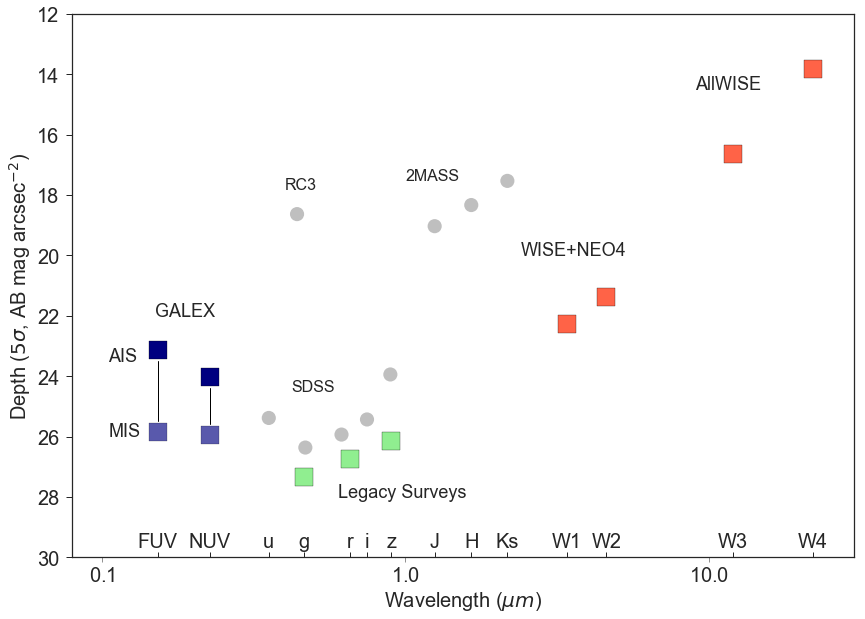

In [87]:
sensitivity(png=os.path.join(adapdir, 'mulimit_vs_wavelength.png'))

### Sample selection & properties

* magnitude vs D(25)
* spatial distribution of the sample

In [299]:
def qa_binned_radec(cat, nside=64, png=None):
    import warnings
    import healpy as hp
    import desimodel.io
    import desimodel.footprint
    from desiutil.plots import init_sky, plot_sky_binned
    
    ra, dec = cat['ra'].data, cat['dec'].data
    hpix = desimodel.footprint.radec2pix(nside, ra, dec)
    
    fig, ax = plt.subplots(figsize=(9, 5))

    with warnings.catch_warnings():
        pixweight = desimodel.io.load_pixweight(nside)
        fracarea = pixweight[hpix]
        weight = 1 / fracarea
        
        warnings.simplefilter('ignore')
        basemap = init_sky(galactic_plane_color='k', ax=ax,
                           ra_labels=[0,  60, 120, 180, 240, 300], 
                           dec_labels=[-60, -30,   0,  30,  60])
        plot_sky_binned(ra, dec, weights=weight, 
                        max_bin_area=hp.nside2pixarea(nside, degrees=True),
                        verbose=True, clip_lo='!1', clip_hi='98%', cmap='viridis',
                        plot_type='healpix', basemap=basemap, 
                        label=r'Large Galaxies (deg$^{-2}$)')
        #plt.suptitle('Parent Sample')
    
    if png:
        fig.savefig(png)

Using healpix map with NSIDE=64 and pixel area 0.839 sq.deg.


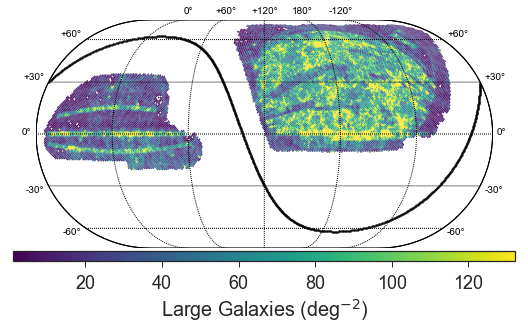

In [300]:
qa_binned_radec(parent, png=os.path.join(adapdir, 'sample_radec.png'))

In [305]:
def qa_sample(png=None):

    d25lim = (-1, 2)
    #d25lim = (np.log10(10/60), 3)
    mulim = (32, 18)
    Blim = (5, 25.2)

    leda_igal = leda['objtype'] == 'G'
    igal = parent['objtype'] == 'G'

    m31 = np.where(leda['galaxy'][leda_igal] == 'NGC0224')[0]
    smc = np.where(leda['galaxy'][leda_igal] == 'NGC0292')[0]
        
    mag, d25, mu = parent['mag'][igal], np.log10(parent['d25'][igal]), parent['sb_d25'][igal]
    leda_mag, leda_d25, leda_mu = leda['mag'][leda_igal], np.log10(leda['d25'][leda_igal]), leda['sb_d25'][leda_igal]
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    #ax1.hexbin(leda_mag, leda_d25, extent=(np.hstack( (Blim, d25lim) )), 
    #           mincnt=1, cmap='gray', alpha=0.5) # 'Blues_r')
    #ax1.scatter(mag, d25, s=5, color='firebrick', alpha=0.5)
    ax1.hexbin(mag, d25, extent=(np.hstack( (Blim, d25lim) )), bins='log', 
               mincnt=1, cmap='viridis', alpha=0.5) # 'Blues_r')
    
    ax1.axhline(y=np.log10(10/60), ls='--', lw=2, color='k')#, xmin=7, xmax=24
    
    ax1.set_xlim(Blim)
    ax1.set_ylim(d25lim)
    ax1.set_xlabel(r'$B_{AB}$ (mag)')
    ax1.set_ylabel(r'$\log_{10}\, D_{25}$ (arcmin)')

    if False:
        ax1.annotate('M31', xy=(leda_mag[m31], leda_d25[m31]), xytext=[leda_mag[m31]+6, leda_d25[m31]+0.4], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='center',
                                     verticalalignment='top')

        ax1.annotate('SMC', xy=(leda_mag[smc], leda_d25[smc]), xytext=[leda_mag[smc]+0.7, leda_d25[smc]-0.8], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='left',
                                     verticalalignment='top')
    
    #ax2.hexbin(leda_d25, leda_mu, extent=(np.hstack( (d25lim, mulim) )), 
    #           mincnt=1, cmap='gray', alpha=0.5)
    #ax2.scatter(d25, mu, s=5, color='firebrick', alpha=0.5)
    im = ax2.hexbin(d25, mu, extent=(np.hstack( (d25lim, mulim) )), bins='log',
                    mincnt=1, cmap='viridis', alpha=0.5)
    #cb = fig.colorbar(im, ticks=[np.log10([3, 10, 30, 100, 300, 1000])])
    #cb.ax.set_yticklabels(['3', '10', '30', '100', '300', '1000'])
    #cb.set_label('log$_{10}$ (Number of Galaxies per Bin)')
    
    ax2.axvline(x=np.log10(10/60), ls='--', lw=2, color='k')#, xmin=7, xmax=24
                
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.set_xlim(d25lim)
    ax2.set_ylim(mulim)
    ax2.set_ylabel(r'$\mu_{B}$ (mag arcsec$^{-2}$)')
    ax2.set_xlabel(r'$\log_{10}\, D_{25}$ (arcmin)')
    
    if False:
        ax2.annotate('M31', xy=(leda_d25[m31], leda_mu[m31]), xytext=[leda_d25[m31]-0.8, leda_mu[m31]-4], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='center',
                                     verticalalignment='top')
        ax2.annotate('SMC', xy=(leda_d25[smc], leda_mu[smc]), xytext=[leda_d25[smc], leda_mu[smc]+2], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='right',
                                     verticalalignment='top')
    
    fig.subplots_adjust(wspace=0.07, bottom=0.2)
    
    if png:
        fig.savefig(png)

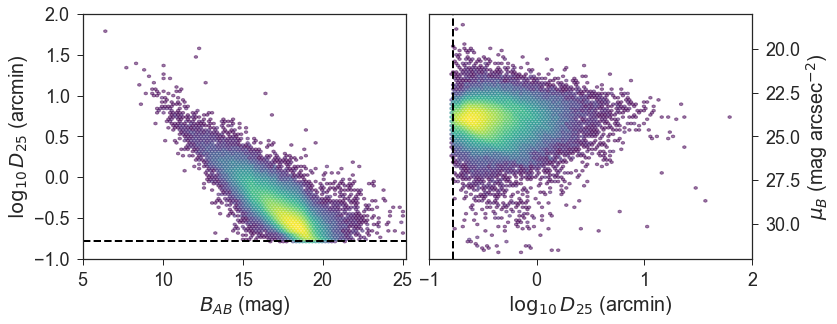

In [306]:
qa_sample(png=os.path.join(adapdir, 'qa_sample.png'))

In [197]:
m31 = leda['galaxy'] == 'NGC0224'
leda[m31]

galaxy,pgc,objtype,ra,dec,type,bar,ring,multiple,compactness,t,d25,r25,pa,bt,it,kt,modbest,z,sb_d25,mag
bytes28,int64,bytes2,float64,float64,bytes4,bytes3,bytes3,bytes3,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
NGC0224,2557,G,10.6846845,41.2689778,Sb,nan,nan,nan,nan,3.0,177.828,0.25527,35.0,4.295,nan,0.994,24.462,-0.000967336,24.1735,4.295


### Galaxy montage

Demonstrate the range of galaxies and environments the atlas will span.  This will likely be the first figure, so do we want to include the GALEX + WISE data?

In [5]:
def make_montage(montage, jpg_clobber=False, png_clobber=False, montage_clobber=False):
    from PIL import Image, ImageDraw, ImageFont

    barlen = np.round(60.0 / PIXSCALE).astype('int') # [1 arcmin in pixels]
    fonttype = os.path.join(LSLGAdir, 'cutouts', 'Georgia.ttf')    
    
    cutouturl = 'http://legacysurvey.org/viewer-dev/jpeg-cutout'

    # Get the viewer cutouts
    for gal in montage:
        size = np.ceil(gal['d25'] * gal['factor'] * 60 / PIXSCALE).astype(np.int)
        
        imageurl = '{}/?ra={:.8f}&dec={:.8f}&pixscale={:.3f}&size={:g}&layer={}'.format(
            cutouturl, gal['ra'], gal['dec'], PIXSCALE, size, gal['layer'])
    
        jpgfile = os.path.join(adapdir, 'montage', '{}.jpg'.format(gal['galaxy']))
        cmd = 'wget --continue -O {:s} "{:s}"' .format(jpgfile, imageurl)
    
        if os.path.isfile(jpgfile) and not jpg_clobber:
            print('File {} exists...skipping.'.format(jpgfile))
        else:
            if os.path.isfile(jpgfile):
                os.remove(jpgfile)
            print(cmd)
            os.system(cmd)

        # Add labels
        pngfile = jpgfile.replace('.jpg', '.png')
        if os.path.isfile(jpgfile):
            if os.path.isfile(pngfile) and not png_clobber:
                print('File {} exists...skipping.'.format(pngfile))
            else:
                im = Image.open(jpgfile)
                sz = im.size
                fntsize = np.round(sz[0]/28).astype('int')
                width = np.round(sz[0]/175).astype('int')
                font = ImageFont.truetype(fonttype, size=fntsize)
                draw = ImageDraw.Draw(im)

                draw.text((0+fntsize*2, 0+fntsize*2), gal['galaxy'].replace('_', ' '), font=font)
    
                # Add a scale bar--
                x0, x1, yy = sz[1]-fntsize*2-barlen, sz[1]-fntsize*2, sz[0]-fntsize*2
                draw.line((x0, yy, x1, yy), fill='white', width=width)
                im.save(pngfile)    
                
    # Make the final montage.
    montagefile = os.path.join(adapdir, 'galaxy-montage.png')
    ncol, nrow = 4, 1
    if os.path.isfile(montagefile) and not montage_clobber:
        print('File {} exists...skipping.'.format(montagefile))
    else:
        cmd = 'montage -bordercolor white -borderwidth 1 -tile {}x{} -geometry 256x256 '.format(ncol, nrow)
        cmd = cmd+' '.join([os.path.join(adapdir, 'montage', '{}.png'.format(gg)) for gg in montage['galaxy']])
        cmd = cmd+' {}'.format(montagefile)
        print(cmd)
        os.system(cmd)        
        print('Writing {}'.format(montagefile))
                

In [6]:
w1 = np.where(parent['galaxy'] == 'NGC3938')[0]
w2 = np.where(parent['galaxy'] == 'NGC5322')[0]
w3 = np.where(parent['galaxy'] == 'IC4182')[0]
w4 = np.where(parent['galaxy'] == 'PGC044711')[0]
these = np.hstack( (w1, w2, w3, w4) )
montage = parent[these]
montage['layer'] = ['mzls+bass-dr6', 'mzls+bass-dr6', 'mzls+bass-dr6', 'decals-dr5']
montage['factor'] = [2.5, 2.5, 2.5, 3.5]
montage['galaxy'][3] = 'CGCG071-093_Group'
montage

galaxy,pgc,objtype,ra,dec,type,bar,ring,multiple,compactness,t,d25,r25,pa,bt,it,kt,modbest,z,sb_d25,mag,groupid,designation,wise_ra,wise_dec,cntr,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro,nb,na,cc_flags,ext_flg,ph_qual,w1mag,w1sigm,w2mag,w2sigm,w3mag,w3sigm,w4mag,w4sigm,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,inwise,layer,factor
bytes28,int64,bytes2,float64,float64,bytes4,bytes3,bytes3,bytes3,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bytes20,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,bytes4,int32,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,bool,str13,float64
NGC3938,37229,G,178.2058515,44.1207736,Sc,nan,nan,nan,nan,5.1,5.39511,0.104713,nan,10.875,nan,7.861,30.869,0.00269586,23.1635,10.875,42168,J115249.43+440714.8,178.2059666,44.1207889,1789143901351039886,10.617,0.024,10.629,0.021,8.191,0.036,5.813,0.053,1,0,0000,5,AAAA,10.48,0.019,10.442,0.024,7.651,0.123,5.034,0.147,481322632,13.019,0.061,12.523,0.087,12.567,0.104,True,mzls+bass-dr6,2.5
NGC5322,49044,G,207.313452,60.1904759,E,nan,nan,nan,nan,-4.8,5.62341,0.161065,95.0,11.049,nan,7.188,32.444,0.00600782,23.4275,11.049,55884,J134915.28+601125.9,207.3136877,60.1905346,2070160501351018878,8.697,0.022,8.688,0.02,7.758,0.018,6.193,0.046,1,0,0000,5,AAAA,8.712,0.006,8.753,0.006,7.597,0.009,5.962,0.033,648499797,11.079,0.067,10.406,0.083,9.915,0.053,True,mzls+bass-dr6,2.5
IC4182,45314,G,196.455276,37.6046589,Sm,nan,nan,nan,nan,8.8,6.01174,0.108893,nan,12.589,nan,10.064,28.203,0.00104572,25.1125,12.589,51164,NULL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,mzls+bass-dr6,2.5
CGCG071-093_Group,44711,G,195.0304245,8.6986047,S0,nan,nan,M,nan,-2.0,0.672977,0.115611,24.71,14.991,13.67,11.381,36.589,0.0466833,22.7595,14.991,48492,J130007.29+084155.1,195.0304106,8.6986445,1945109001351023498,11.882,0.022,11.703,0.022,8.782,0.026,6.954,0.084,1,0,0000,5,AAAA,11.716,0.006,11.517,0.009,8.38,0.018,6.45,0.096,892108157,14.213,0.083,13.581,0.091,13.184,0.091,True,decals-dr5,3.5


In [7]:
make_montage(montage, jpg_clobber=False, png_clobber=False, montage_clobber=False)

File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/NGC3938.jpg exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/NGC3938.png exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/NGC5322.jpg exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/NGC5322.png exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/IC4182.jpg exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/IC4182.png exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/CGCG071-093_Group.jpg exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/montage/CGCG071-093_Group.png exists...skipping.
File /Users/ioannis/repos/papers/grants/nasa-adap-2018/galaxy-montage.png exists...skipping.


### WISE surface brightness profile

Demonstrate the improved depth of the NEO3 data vs unWISE by generating the azimuthally averaged surface brightness profile in W1 and W2.

```bash

salloc -N 1 -C haswell -t 00:60:00 --qos interactive -L SCRATCH,project
source ~/software/develop-legacysurveys-code

export UNWISE_COADDS_DIR=/global/cscratch1/sd/ameisner/unwise-coadds/fulldepth_neo4:/global/project/projectdirs/cosmo/data/unwise/allwise/unwise-coadds/fulldepth
wise-galex-cutouts -r 207.313452 -d 60.1904759 --radius 720 --survey-dir /global/projecta/projectdirs/cosmo/data/legacysurvey/dr6 --prefix NGC5322 

export UNWISE_COADDS_DIR=/global/project/projectdirs/cosmo/data/unwise/allwise/unwise-coadds/fulldepth
wise-galex-cutouts -r 207.313452 -d 60.1904759 --radius 720 --survey-dir /global/projecta/projectdirs/cosmo/data/legacysurvey/dr6 --prefix NGC5322-AllWISE

```

In [34]:
from photutils import CircularAperture, aperture_photometry, CircularAnnulus
pixscale = 2.75 / 2
img = fitsio.read(os.path.join(adapdir, 'wise-sbprofiles', 'NGC5322-W1-image.fits'))
img /= pixscale**2

H, W = img.shape
dr = 3
rin = np.arange(1, H-dr, dr)
rout = rin + dr

phot = []
for r1, r2 in zip(rin, rout):
    aper = CircularAnnulus(( H / 2, W / 2), r_in=r1, r_out=r2)
    phot.append(aperture_photometry(img, aper))
phot = vstack(phot)
#phot

In [91]:
def wise_ellipsefit():
    """Measure the surface brightness profile in the deep and shallow W1 image.
    
    """
    from astropy.stats import sigma_clipped_stats
    from photutils import make_source_mask
    from photutils.isophote import (EllipseGeometry, Ellipse, EllipseSample,
                                    Isophote, IsophoteList)
    from photutils.isophote.sample import CentralEllipseSample
    from photutils.isophote.fitter import CentralEllipseFitter
    from mge.find_galaxy import find_galaxy

    WISE = dict()
    WISE['W1deep'] = fitsio.read(os.path.join(adapdir, 'wise-sbprofiles', 'NGC5322-W1-image.fits'))
    WISE['W1shallow'] = fitsio.read(os.path.join(adapdir, 'wise-sbprofiles', 'NGC5322-AllWISE-W1-image.fits'))
    
    # Get the surface brightness limit for each image.
    img = WISE['W1deep']
    mask = make_source_mask(img, snr=2, npixels=5, dilate_size=11)
    
    for suffix in ('deep', 'shallow'):
        img = WISE['W1{}'.format(suffix)]
        mean, median, std = sigma_clipped_stats(img, sigma=3.0, mask=mask)
        WISE['mulim_{}'.format(suffix)] = 22.5 - 2.5 * np.log10(5 * std)
        print(WISE['mulim_{}'.format(suffix)])
    
    # Get the geometry of the galaxy.
    img = WISE['W1deep']
    gal = find_galaxy(img, nblob=1, binning=3, plot=False, quiet=True)
    geometry = EllipseGeometry(x0=gal.xpeak, y0=gal.ypeak, eps=gal.eps,
                               sma=5, pa=np.radians(gal.pa-90))    
    ellipse = Ellipse(img, geometry=geometry)
    
    integrmode, sclip, nclip, step, fflag = 'bilinear', 3, 0, 0.1, 0.5
    isophot = ellipse.fit_image(minsma=1.0, maxsma=3*gal.majoraxis,
                                integrmode=integrmode, sclip=sclip, nclip=nclip,
                                step=step, fflag=fflag)
    WISE['isophot_deep'] = isophot
    
    img = WISE['W1shallow']
    isobandfit = []
    for iso in isophot:
        g = iso.sample.geometry # fixed geometry

        # Use the same integration mode and clipping parameters.
        sample = EllipseSample(img, g.sma, geometry=g, integrmode=integrmode,
                               sclip=sclip, nclip=nclip)
        sample.update()

        # Create an Isophote instance with the sample.
        isobandfit.append(Isophote(sample, 0, True, 0))

    WISE['isophot_shallow'] = IsophoteList(isobandfit)
        
    return WISE

In [95]:
%time WISE = wise_ellipsefit()

19.7665518625
19.281107822
CPU times: user 27.3 s, sys: 280 ms, total: 27.5 s
Wall time: 17.7 s


In [141]:
def wise_sbprofile(WISE, png=None):
    sma = WISE['isophot_deep'].sma / 60
    
    fig, ax = plt.subplots(figsize=(8, 6))
    for label, suffix in zip( ('WISE', 'WISE+NEO4'), ('shallow', 'deep') ):
        mu = 22.5 - 2.5 * np.log10(WISE['isophot_{}'.format(suffix)].intens)
        mu_err = WISE['isophot_{}'.format(suffix)].int_err / WISE['isophot_{}'.format(suffix)].intens / np.log(10)
        mu_err[mu_err < 0.1] = 0.1
        
        ax.fill_between(sma**0.25, mu - mu_err, mu + mu_err, label=label, alpha=0.8)
        ax.axhline(y=WISE['mulim_{}'.format(suffix)], lw=2, color='k', ls='--')
        
    #for suffix in ('shallow', 'deep'):
    #    ax.axhline(y=WISE['mulim_{}'.format(suffix)], color='k', lw=2)
    
    ax.legend(loc='upper right')
    #ax.margins(0)
    ax.set_ylim(22, 11)
    ax.set_xlim(0.4, 1.5)
    
    #ax.set_xscale('log')
    ax.set_xlabel(r'$R^{1/4}$ (arcmin)')
    #ax.set_xlabel(r'(Galactocentric Radius)$^{1/4}$ (arcmin)')
    ax.set_ylabel(r'Surface Brightness (mag arcsec$^{-2}$)')
    
    if png:
        fig.savefig(png)

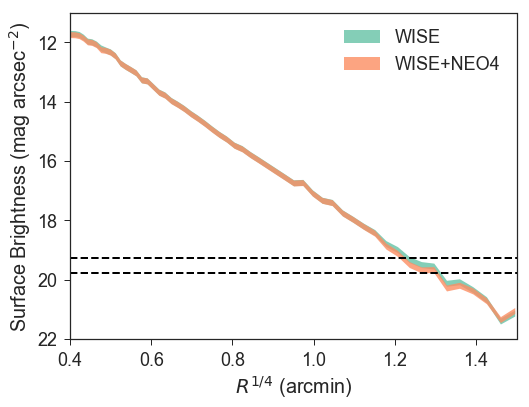

In [142]:
wise_sbprofile(WISE, png=os.path.join(adapdir, 'wise-sbprofiles.png'))

In [79]:
from astropy.stats import sigma_clipped_stats
from photutils import make_source_mask
mask = make_source_mask(img, snr=2, npixels=5, dilate_size=11)
mean, median, std = sigma_clipped_stats(img, sigma=3.0, mask=mask)
print((mean, median, std)) 
print( 22.5 - 2.5 * np.log10(3 * std) )

(1.2853065847668965, 1.0493785, 1.3556114172081286)
20.9768588185


### Multipanel montage of one galaxy in GALEX+LS+WISE

We probably want two different figures, one of a spiral galaxy and another of an earlyish-type.  I'm thinking a 3x3 figure, with data+model+residuals along columns, and GALEX+LS+WISE along rows.

Or this could be a Nx3 where N is some number of galaxies and the three columns are GALEX+LS+WISE.